 **#Name: Priyanka Kumari**



***About me in one line: Always trying to create impact using technology***

# **TLMC FELLOWSHIP (NLP TASK)**

**Algorithm Used: BERT (Bidirectional Encoder Representations from Transformers)**



***BERT is based on the Transformer architecture***

 **ABOUT BERT:** Bidirectional Encoder Representations from Transformers is known as BERT. It is intended to jointly condition on both left and right context to pre-train deep bidirectional representations from unlabeled text. With just one additional output layer, the pre-trained BERT model can be improved to produce cutting-edge models for a variety of NLP tasks.

In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 10.2 MB/s 
     |████████████████████████████████| 120 kB 50.4 MB/s 
     |████████████████████████████████| 6.6 MB 49.4 MB/s 


In [10]:
import torch
import pandas as pd
import numpy as np
from transformers import Trainer, TrainingArguments
from transformers import EarlyStoppingCallback
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, classification_report
from transformers import BertTokenizer, BertForSequenceClassification
from tqdm import tqdm
import os
os.environ["WANDB_DISABLED"] = "true"

In [53]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from transformers import EarlyStoppingCallback
import torch
from tqdm import tqdm
import os
os.environ["WANDB_DISABLED"] = "true"

In [27]:
def batchTokenizerFetch(tokenizer, dataset):
    return tokenizer.batch_encode_plus(dataset,max_length=256,truncation=True,add_special_tokens=True,
                                       padding=True,return_attention_mask=True,return_tensors='pt')

In [60]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val
                in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [45]:
def compute_metrics(p):
    prediction, labels = p
    preds_flat = np.argmax(prediction, axis=1).flatten()
    labels_flat = labels.flatten()
    f1 = f1_score(labels_flat, preds_flat, average='macro')
    return {"f1": f1}

In [14]:
import pandas as pd

In [9]:
from google.colab import files
uploaded=files.upload()

Saving ecommerceDataset.csv to ecommerceDataset.csv


In [15]:
dataset=pd.read_csv('ecommerceDataset.csv')

In [16]:
print(dataset.shape)
print(dataset.head(5))

(50424, 2)
   Household  \
0  Household   
1  Household   
2  Household   
3  Household   
4  Household   

  Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and sty

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
df = pd.read_csv('ecommerceDataset.csv', names=["labels", "descriptions"])
descriptions = df["descriptions"].map(str).values.tolist()
labels = df["labels"].values.tolist()

le = LabelEncoder()
labels = le.fit_transform(labels).tolist()

***Reason behind using BERT:***  
**In many natural language problems, BERT outperforms the state-of-the-art by assisting machines in learning excellent representations of text in relation to context.**

The BERT architecture builds on top of Transformer. We currently have two variants available:

BERT Base: 12 layers (transformer blocks), 12 attention heads, and 110 million parameters
                                                   BERT Large: 24 layers (transformer blocks), 16 attention heads and, 340 million parameters. 
                                                   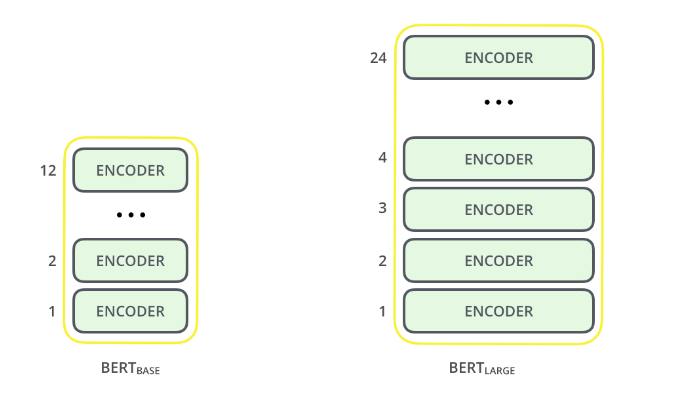

The BERT Base architecture has the same model size as OpenAI’s GPT for comparison purposes. All of these Transformer layers are Encoder-only blocks.

In [20]:
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=4)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

 **Text Preprocessing of bert**

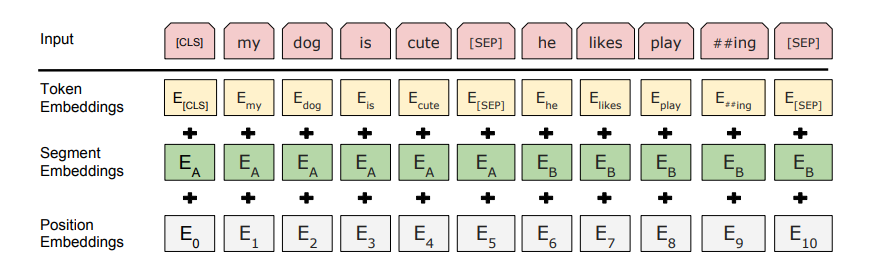

In [21]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased", do_lower_case=True)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

In [22]:
x_train, x_test, y_train, y_test = train_test_split(descriptions, labels, test_size=0.4, stratify=labels, random_state=46)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=46)

In [48]:
x_train_tokens = batchTokenizerFetch(tokenizer, x_train)
x_valid_tokens = batchTokenizerFetch(tokenizer, x_valid)
x_test_tokens = batchTokenizerFetch(tokenizer, x_test)

In [62]:
train_dataset = Dataset(x_train_tokens, y_train)
valid_dataset = Dataset(x_valid_tokens, y_valid)
test_dataset = Dataset(x_test_tokens, y_test)

In [63]:
args = TrainingArguments(output_dir="output", evaluation_strategy="epoch", metric_for_best_model="f1",
                          save_strategy="epoch", num_train_epochs=3, load_best_model_at_end=True)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [64]:
trainer = Trainer(args=args,
                    model=model,
                    train_dataset=train_dataset,
                    eval_dataset=valid_dataset,
                    compute_metrics=compute_metrics,
                    callbacks=[EarlyStoppingCallback(
                            early_stopping_patience=3)]
                    )

In [ ]:
trainer.train()
trainer = Trainer(model=model)
predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=1).flatten()
true_vals = predictions.label_ids

***** Running training *****
  Num examples = 30255
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 11346
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss


In [ ]:
print(classification_report(true_vals, preds, target_names=list(le.classes_)))

                        precision    recall  f1-score   support

                 Books       0.99      0.97      0.98      2335
      Clothing & Accessories 0.99      0.98      0.99      1772
         Electronics         0.97      0.97      0.97      2111
         Household           0.98      0.99      0.98      3867

              accuracy                           0.98     10085
             macro avg       0.98      0.98      0.98     10085
          weighted avg       0.98      0.98      0.98     10085
